In [16]:
from data_io.DataLoader import DataLoader
from models.Visualization import *

import models.Model1
reload(models.Model1)
from models.Model1 import Model1

import numpy as np
import cv2

## Load Training Data

In [17]:
dl = DataLoader("/Users/iankurgarg/Code/Vision/Project-1/image-classification/images-spondon/")

face, non_face = dl.load_data(train=1)

## Visualize Mean and Covariance Matrix

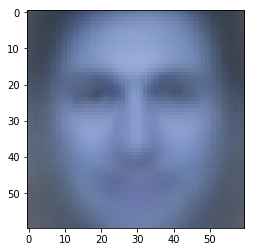

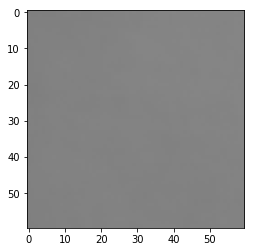

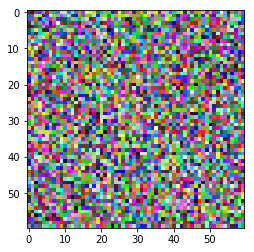

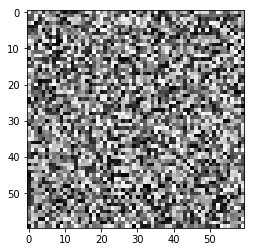

In [18]:
show_mean(face, dim3=3)
show_mean(non_face, dim3=3)
show_cov(face, dim3=3)
show_cov(non_face, dim3=3)

## Fit Model 1 - Single Gaussian Model

In [19]:
m = Model1()
m.fit(face, non_face)

## Load Testing Data

In [20]:
test_face, test_non_face = dl.load_data(train=0)
testX = np.concatenate((test_face, test_non_face))
testY = [1]*len(test_face) + [0]*len(test_non_face)

## Predict Labels for Test Data

In [21]:
len(testY)

200

In [22]:
predicted = m.predict(testX)

print "false_positive_rate = ", m.false_positive_rate(testY, predicted)
print "false_negative_rate = ", m.false_negative_rate(testY, predicted)
print "misclassification_rate = ", m.misclassification_rate(testY, predicted)

false_positive_rate =  0.22480620155
false_negative_rate =  0.0
misclassification_rate =  0.145


0

## Threshold Variation for ROC

In [14]:
fpr = []
tpr = []
for thresh in np.arange(0.01, 0.99, 0.01):
    m.thresh = thresh
    predicted = m.predict(testX)

    fp = m.false_positive_rate(testY, predicted)
    fn = m.false_negative_rate(testY, predicted)
    fpr.append(fp)
    tpr.append(1-fn)


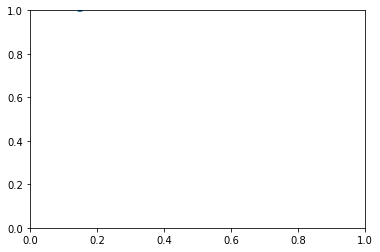

In [15]:
plt.plot(fpr, tpr)
plt.xlim((0,1))
plt.ylim((0,1))
plt.show()